# <u><b> Objective </b></u>
## <b> You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the tweets.csv data, clean and tokenize the tweets using nltk library.
* ### Count vectorize the tweets so that you end up with a sparse matrix (which will be your $X$). 
* ### You are supposed to build a SVM classifier (a binary classification in fact). Since the data contains three levels of sentiment(positive, negative and neutral), you should remove the sentences which are neutral. Once you do that you will have two classes only (positive and negative). You can set the label of positive tweets to 1 and negative tweets to 0.
* ### Once you have built the SVM classifier, evaluate this model across various metrics. Also plot the ROC curve and Precision-Recall curve. Report the areas under these two curves along with other metrics.
* ### Perform GridSearch cross validation for various values of $C$ and $gamma$. These will be the hyperparameters which you would play around with.
* ### Explain your observations and the underlying reasons for these.
* ### Try checking if <code>tfidfvectorizer</code> helps you gain lift in model's performance.





In [46]:
import pandas as pd
import numpy as np

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 11/3. Support Vector Machines/Tweets.csv')

In [49]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [50]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [51]:
df.shape

(14640, 15)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [53]:
df=df[['airline_sentiment','text']]

In [54]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [55]:
# for i in df.columns:
#   if i=='neutral':
#     df.drop(,axis=0,inplace=True)

In [56]:
# df.drop(1,axis=0,inplace=True)

In [57]:
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [58]:
#Get rid of stop words and punctuations
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
import string
from nltk.corpus import stopwords

In [60]:
len(stopwords.words('english'))

179

In [61]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [63]:
df['text'] = df['text'].apply(text_process)

In [64]:
df

,airline_sentiment,text
0,neutral,VirginAmerica dhepburn said
1,positive,VirginAmerica plus youve added commercials exp...
2,neutral,VirginAmerica didnt today Must mean need take ...
3,negative,VirginAmerica really aggressive blast obnoxiou...
4,negative,VirginAmerica really big bad thing
...,...,...
14635,positive,AmericanAir thank got different flight Chicago
14636,negative,AmericanAir leaving 20 minutes Late Flight war...
14637,neutral,AmericanAir Please bring American Airlines Bla...
14638,negative,AmericanAir money change flight dont answer ph...


In [65]:
df=df[df["airline_sentiment"]!='neutral']
df

,airline_sentiment,text
1,positive,VirginAmerica plus youve added commercials exp...
3,negative,VirginAmerica really aggressive blast obnoxiou...
4,negative,VirginAmerica really big bad thing
5,negative,VirginAmerica seriously would pay 30 flight se...
6,positive,VirginAmerica yes nearly every time fly VX “ea...
...,...,...
14633,negative,AmericanAir flight Cancelled Flightled leaving...
14634,negative,AmericanAir right cue delays👌
14635,positive,AmericanAir thank got different flight Chicago
14636,negative,AmericanAir leaving 20 minutes Late Flight war...


In [66]:
df1=pd.get_dummies(df['airline_sentiment'])

In [67]:
df=pd.concat((df1,df),axis=1)


In [68]:
df=df.drop(['negative','airline_sentiment'],axis=1)

In [69]:
df

,positive,text
1,1,VirginAmerica plus youve added commercials exp...
3,0,VirginAmerica really aggressive blast obnoxiou...
4,0,VirginAmerica really big bad thing
5,0,VirginAmerica seriously would pay 30 flight se...
6,1,VirginAmerica yes nearly every time fly VX “ea...
...,...,...
14633,0,AmericanAir flight Cancelled Flightled leaving...
14634,0,AmericanAir right cue delays👌
14635,1,AmericanAir thank got different flight Chicago
14636,0,AmericanAir leaving 20 minutes Late Flight war...


Using vectorizer before split

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)

In [79]:
X=vectorizer.fit_transform(df['text'])


In [80]:
print(X[999])

  (0, 162)	1
  (0, 1389)	1
  (0, 1166)	1
  (0, 845)	1
  (0, 1277)	1


In [81]:
len(vectorizer.get_feature_names_out())

1504

In [82]:
print(vectorizer.get_feature_names_out())

['10' '100' '1000' ... 'yr' 'yyz' 'zero']


In [83]:
y=df['positive']
y

1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: positive, Length: 11541, dtype: uint8

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [85]:
from sklearn.svm import SVC
clf = SVC()

In [86]:
clf.fit(X_train,y_train)

SVC()

In [87]:
train_array=X_train.toarray()
test_array=X_test.toarray()

In [89]:
train_pred=clf.predict(train_array)
test_pred=clf.predict(test_array)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
print(confusion_matrix(y_test,test_pred))

[[1782   39]
 [ 169  319]]


In [92]:
print(classification_report(y_test,test_pred))
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6519011-evaluate-the-performance-of-a-classification-model

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1821
           1       0.89      0.65      0.75       488

    accuracy                           0.91      2309
   macro avg       0.90      0.82      0.85      2309
weighted avg       0.91      0.91      0.90      2309



Using vectorizer after split

In [94]:
X=df['text']
y=df['positive']


In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [97]:
# train_vectorized = vectorizer.transform(X_train)
# test_vectorized = vectorizer.transform(X_test)

In [96]:
from sklearn.svm import SVC
clf = SVC()

In [98]:
train_vectorized = vectorizer.fit_transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [99]:
clf.fit(train_vectorized, y_train)

SVC()

In [100]:
train_pred=clf.predict(train_vectorized)

In [101]:
test_pred=clf.predict(test_vectorized)

In [102]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred))
print(confusion_matrix(y_test,test_pred))

[[7253   52]
 [ 337 1590]]
[[1830   43]
 [ 144  292]]


In [103]:
from sklearn import datasets,svm,model_selection,metrics

In [104]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7305
           1       0.97      0.83      0.89      1927

    accuracy                           0.96      9232
   macro avg       0.96      0.91      0.93      9232
weighted avg       0.96      0.96      0.96      9232



              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1873
           1       0.87      0.67      0.76       436

    accuracy                           0.92      2309
   macro avg       0.90      0.82      0.85      2309
weighted avg       0.92      0.92      0.91      2309



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


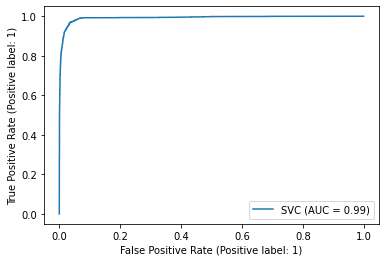

In [105]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, train_vectorized, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


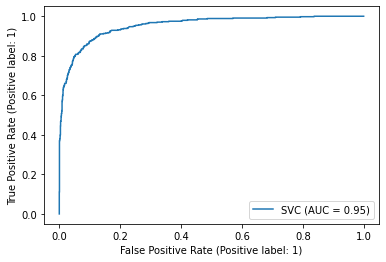

In [106]:
metrics.plot_roc_curve(clf,test_vectorized,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


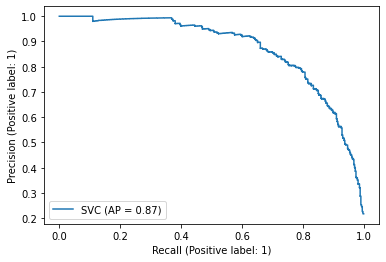

In [107]:
metrics.plot_precision_recall_curve(clf,test_vectorized,y_test)

In [108]:
# https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6519011-evaluate-the-performance-of-a-classification-model


Using Grid search cv

In [374]:
from sklearn.model_selection import GridSearchCV 


In [375]:
param_dict = {'C': [0.1, 1, 10, 1000],  
              'gamma': [1, 0.1, 0.01, 0.0001], 
              'kernel': ['rbf','linear','poly']} 

In [376]:
grid = GridSearchCV(clf, param_dict,n_jobs=2, cv=5, verbose = 10,scoring='accuracy') 

In [377]:
grid.fit(train_vectorized,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=10)

In [378]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [379]:
g_pred_tr=grid.predict(train_vectorized)

In [380]:
g_pred_test=grid.predict(test_vectorized)

In [381]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,g_pred_tr))
print(confusion_matrix(y_test,g_pred_test))


[[7239  139]
 [ 454 1400]]
[[1743   57]
 [ 159  350]]


In [382]:
# Print the classification report for train and test
print(classification_report(y_train,g_pred_tr))
print("\n")
print(classification_report(y_test,g_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7378
           1       0.91      0.76      0.83      1854

    accuracy                           0.94      9232
   macro avg       0.93      0.87      0.89      9232
weighted avg       0.93      0.94      0.93      9232



              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1800
           1       0.86      0.69      0.76       509

    accuracy                           0.91      2309
   macro avg       0.89      0.83      0.85      2309
weighted avg       0.90      0.91      0.90      2309



##**Roc and precison recall curve for grid train data.**


In [ ]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(grid, train_vectorized, y_train) 

In [ ]:
metrics.plot_precision_recall_curve(grid, train_vectorized, y_train)


##**Roc and precison recall curve for grid test data.**

In [ ]:
metrics.plot_precision_recall_curve(grid, test_vectorized, y_test)


In [ ]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(grid, test_vectorized, y_test)

##**Vectorize using TFIDF vectorizer.**

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopwords.words('english'))

In [111]:
train_vectorized=tf_vectorizer.fit_transform(X_train)
test_vectorized=tf_vectorizer.transform(X_test)

In [112]:
clf_tf =SVC()

In [113]:
clf_tf.fit(train_vectorized,y_train)

SVC()

In [115]:
train_preds=clf_tf.predict(train_vectorized)
test_preds=clf_tf.predict(test_vectorized)


In [117]:
print(confusion_matrix(y_test,test_pred))

[[1830   43]
 [ 144  292]]


In [118]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1873
           1       0.87      0.67      0.76       436

    accuracy                           0.92      2309
   macro avg       0.90      0.82      0.85      2309
weighted avg       0.92      0.92      0.91      2309



##**Roc and precison recall curve for train and test data.**


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


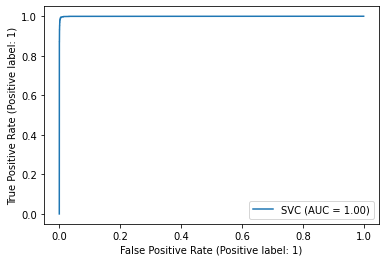

In [124]:
metrics.plot_roc_curve(clf_tf,train_vectorized,y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


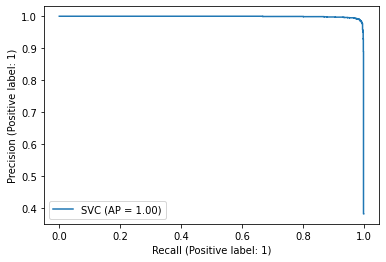

In [126]:
metrics.plot_precision_recall_curve(clf_tf, train_vectorized, y_train)


Roc and precison recall curve for Tfidf test data.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


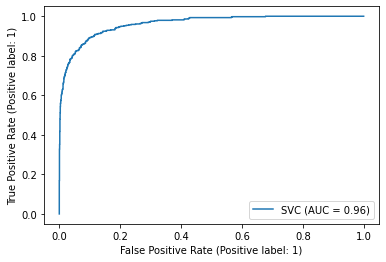

In [130]:
metrics.plot_roc_curve(clf_tf,test_vectorized,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


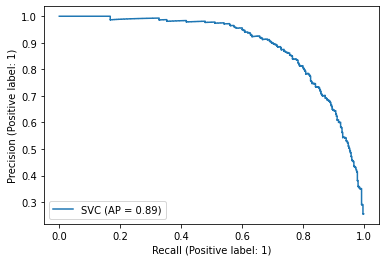

In [132]:
metrics.plot_precision_recall_curve(clf_tf,test_vectorized,y_test)